In [2]:
import pandas as pd
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt
import math
import random
import sklearn
import Bio
from collections import Counter
from Bio import SeqIO, AlignIO, Phylo
from Bio.Alphabet import IUPAC,generic_alphabet,generic_dna
from Bio.SeqUtils import GC
from sklearn.metrics import pairwise_distances

#### Visualize the alignment and convert it to Pandas DF

In [3]:
alignment1 = pd.read_csv('DATA1/B16-4-R1_MapGeneious.csv')  # Number of sequences 1574

In [4]:
len_alignment1 = alignment1['alignedSequences'].str.len()
print(list(len_alignment1))

[178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,

In [5]:
print(alignment1.shape)

(1575, 2) (1884, 2) (1506, 2)


In [5]:
print(alignment1.loc[alignment1['alignedSequences']=='(missing)'])
"""There are no missing values"""

Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []


'There are no missing values'

In [6]:
print(alignment1['alignedSequences'].isnull().sum())
"""There are no null values"""

0


'There are no null values'

In [8]:
print(alignment1.dtypes)

sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object


### Detecting mutations

#### Hamming distance:

Calculating the hamming distance (HD) in each alignment (1,2,3).
HD refers to the number of nucleotide differences between two sequences.

In this exercise each sequence in the alignment is being compared to a reference (ref) sequence.

Alignment 1,2,3 refer to three time points taken from the population during the course of evolution to see the mutational profile along time.

In [7]:
def hamming_distance(string1, string2): 
    distance = 0
    length = len(string1)
    for i in range(length):
        if string1[i] != string2[i]:
            distance += 1
    return distance

In [8]:
ref1='CTTTAA---G-GT-TC---A---G---T---G---A---A---T---AC--T-G-TT-G-AG-A--A-CG-CTGG-TTCG-T--CA--C-T--T-C--CA-T--CGCGAG--CTG-CCTCCC-GTG-CATCC-GA-A-GA-TGTT-C-TCAAGCTCTAA-GG-G-CAGA-TTT-GTC-TT-TT--CC-TGGTCACTAT---AA-TGT-AT---------------T---------------C----------T-----TC------T--------------T------------A-T---------A-GT-G--A-G-T----C-G-T-A-TTAG'

In [12]:
print(len(ref1))

178 188 171


In [9]:
alignment1['hdTotal']=alignment1.alignedSequences.apply(hamming_distance, args=(ref1,))

In [10]:
alignment1.head(2)

,sequenceNames,alignedSequences,hdTotal
0,B16_Only_ForReference,CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...,150
1,M02137_143_000000000_APU54_1_1112_15818_16828_...,TTGGCTTCGATT---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...,154


In [11]:
print(list(alignment1.hdTotal)) ## List of hamming distances for each sequence in the alignment

[150, 154, 155, 149, 152, 152, 152, 151, 152, 151, 154, 156, 153, 155, 155, 155, 155, 155, 155, 154, 154, 155, 154, 155, 155, 155, 155, 155, 155, 155, 155, 155, 154, 155, 155, 154, 155, 155, 155, 155, 155, 155, 153, 155, 155, 155, 155, 155, 155, 154, 156, 156, 155, 155, 155, 155, 155, 154, 155, 155, 153, 155, 154, 155, 153, 154, 154, 155, 153, 154, 154, 154, 153, 151, 154, 154, 154, 154, 154, 154, 154, 154, 154, 153, 154, 152, 154, 154, 154, 154, 154, 154, 154, 153, 157, 154, 154, 154, 154, 154, 154, 155, 154, 154, 154, 154, 154, 153, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 153, 155, 154, 154, 155, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 153, 154, 154, 154, 154, 154, 154, 154, 154, 154, 154, 155, 154, 154, 153, 154, 156, 154, 154, 153, 154, 154, 155, 154, 153, 154, 154, 154, 153, 153, 154, 154, 154, 154,

In [12]:
# Total mutations in the alignment
mutationsTotal1 = alignment1.hdTotal.sum()
print(mutationsTotal1)

#### Detecting unique sequences:

In [13]:
def uniqueSequences(file):
    name = []
    seq = []
    percentage = []
    with open(file, 'r') as file:
        for line in file:
            values = line.split(' ')
            name.append(values[0])
            seq.append(values[1])
    s = np.array(seq)
    u, counts = np.unique(s, return_counts = True)
    print ('Number of unique sequences: ',len(counts))
    print ('Total sequences: ', len(seq))
    print('Percentage unique sequences: ', len(counts)*100/len(seq))

In [14]:
uniqueSequences('DATA1/B16-4-R1_MapGeneious.phy')

Number of unique sequences:  270
Total sequences:  1576
Percentage unique sequences:  17.131979695431472


#### Detect indel mutations:

Mutations can be of different types and can have different cost.
Substitutions refer to the replacement of one nucleotide by another, for example a T than changes to a G. The cost of this type of mutation depends whether the place where it occurs it paired or not. Insertions and Deletions (indels) are another type of mutations in which a nucleotide is lost or a new one inserted. The cost of this mutations can be higher as then can shift the whole sequence frame. For this reason, here we are checking for indels.

In [15]:
def count_indels(file):
    count_insertions=0
    count_deletions=0
    with open(file, 'r') as file:
        for line in file:
            sequence = line.split(' ')[1]
            count_insertions+=sequence.count('/')
            count_deletions+=sequence.count('-')    
    print(count_insertions, count_deletions)

In [16]:
count_indels('DATA1/B16-4-R1_MapGeneious.phy')

0 40939


There appear as if there are zero insertions and many deletions. In fact, there are very few insertions, possibly none, in this data set. Certainly, deletions are more evident in the alignments. They are represented by a dash ('-').

#### Calculating Mutations per segment of the sequence:

It is interesting to see the mutational profile along the sequence because not all the nucleotides in the sequence are equally paired nor have the same structural and functional role. Here, the sequence was divided in three segments.

In [22]:
alignment1['seg1'] = alignment1['alignedSequences'].str[0:60]
alignment1['seg2'] = alignment1['alignedSequences'].str[60:120]
alignment1['seg3'] = alignment1['alignedSequences'].str[120:-1]

In [23]:
ref1='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACTTCCATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGG-CAGATTTGTCTTTT-CCTGGTCACTATAA-TGTATTCTTC------T------T------AT-AGTGAGTCGTATTAG'

In [24]:
# Here the reference sequence of each alignment is being divided in the three segments.
ref1_1 = ref1[0:60]
ref1_2 = ref1[60:120]
ref1_3 = ref1[120:-1]

In [25]:
print(len(ref1_1),len(ref1_2),len(ref1_3))

60 60 57
60 60 67
60 60 50


In [26]:
# Verify the columns that have been added to the alignment dataframe
alignment1.columns.tolist()

['sequenceNames', 'alignedSequences', 'hdTotal', 'seg1', 'seg2', 'seg3']

In [27]:
splitedSeq1 = alignment1[['seg1','seg2','seg3']]

In [28]:
print(list(splitedSeq1.seg1.str.len()),list(splitedSeq1.seg2.str.len()),
       list(splitedSeq1.seg3.str.len())) # 60, 60, 57

[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,

In [29]:
# Calculate the hamming distance for each of the three segments within each alignment.

#alignment 1:
splitedSeq1['hd1_1']=splitedSeq1.seg1.apply(hamming_distance, args=(ref1_1,))
splitedSeq1['hd1_2']=splitedSeq1.seg2.apply(hamming_distance, args=(ref1_2,))
splitedSeq1['hd1_3']=splitedSeq1.seg3.apply(hamming_distance, args=(ref1_3,))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [30]:
# Calculating the total (sum) HD per alignment (sampling time-point)
splitedSeq1_HD=splitedSeq1[['hd1_1','hd1_2','hd1_3']]
hdSegTotal1 = splitedSeq1_HD.sum()

In [31]:
print(list(hdSegTotal1), 'TotalSeq',1575)

[19471, 2122, 1101] TotalSeq 1575
[25188, 4222, 2410] TotalSeq 1884
[20412, 3534, 1584] TotalSeq 1506


#### Summary:

In [32]:
mutations = {'Total sequences':[1575,1884,1506],'Sequence Length':[178,188,171],'Total positions':[280350,354192,257526],
             'Number unique sequences':[269,526,409],'Percentage unique sequences':[17.08,27.92,27.16],
             'Insertions':[0,0,0],'Deletions':[40991,66017,28648],'Percentage Deletions':[14.62,18.64,11.12],
             'Substitutions':[22818,33703,25614],'Percentage substitutions':[8.14,9.52,9.95],
            'Segment1 (seg1)':[19471,25188,20412],'Segment2 (seg2)':[2122,4222,3534],'Segment3 (seg3)':[1101,2410,1584],
             'Percentage Mutations seg1':[20.60,26.65,22.59],'Percentage Mutations seg2':[1.88,3.73,2.80],'Percentage Mutations seg3':[1.22,2.67,2.10]}
mutationsDF = pd.DataFrame.from_dict(mutations, orient='index',columns=['Time1', 'Time2', 'Time3'])
mutationsDF

,Time1,Time2,Time3
Total sequences,1575.00,1884.00,1506.00
Sequence Length,178.00,188.00,171.00
Total positions,280350.00,354192.00,257526.00
Number unique sequences,269.00,526.00,409.00
Percentage unique sequences,17.08,27.92,27.16
Insertions,0.00,0.00,0.00
Deletions,40991.00,66017.00,28648.00
Percentage Deletions,14.62,18.64,11.12
Substitutions,22818.00,33703.00,25614.00
Percentage substitutions,8.14,9.52,9.95


Text(0, 0.5, 'Percentage of mutations')

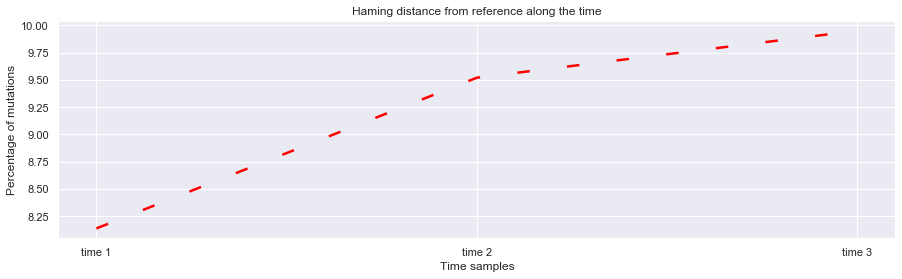

In [33]:
"""Adjusted to the number of sequence in each sample"""
samples = ['time 1', 'time 2', 'time 3']
total_distance = [8.14,9.52,9.95]
plt.figure(figsize=(15,4))
plt.plot(samples, total_distance,linestyle='--', dashes=(5, 15),color='red', linewidth=2.5)
#plt.grid(False)
plt.title('Haming distance from reference along the time')
plt.xlabel('Time samples')
plt.ylabel('Percentage of mutations')
# help from https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots

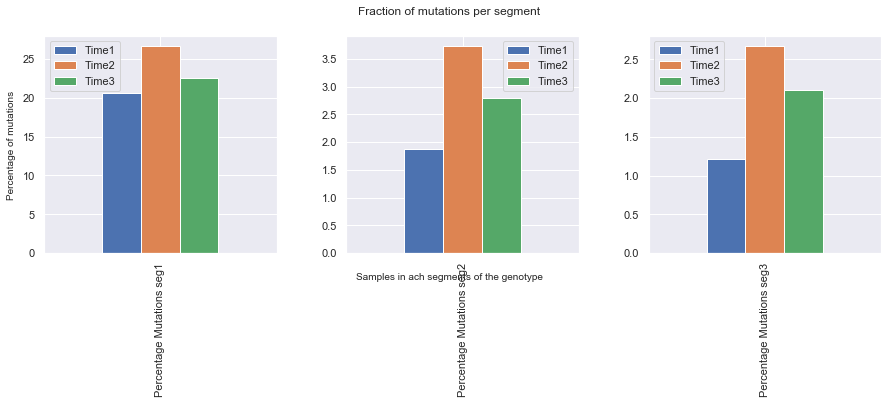

In [34]:
"""Adjusted to the number of sequence in each sample"""

mutations_plot1 = mutationsDF.iloc[13:14,0:]
mutations_plot2 = mutationsDF.iloc[14:15,0:]
mutations_plot3 = mutationsDF.iloc[15:16,0:]

fig = plt.figure(figsize=(15,4))

ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
ax2=fig.add_subplot(133)

mutations_plot1.plot(ax = ax0, kind='bar')
mutations_plot2.plot(ax = ax1, kind='bar')
mutations_plot3.plot(ax = ax2, kind='bar')

fig.suptitle('Fraction of mutations per segment')
fig.text(0.5, 0.04, 'Samples in ach segments of the genotype', ha='center', va='center')
fig.text(0.095, 0.5, 'Percentage of mutations', ha='center', va='center', rotation='vertical')

fig.subplots_adjust(wspace = 0.3)

#### Baic statistics for the hamming distance profile across samples:

In [39]:
stats_splitedSeq1_HD = splitedSeq1_HD.agg({'mean', 'std', 'min', 'max'})
stats_splitedSeq2_HD = splitedSeq2_HD.agg({'mean', 'std', 'min', 'max'})
stats_splitedSeq3_HD = splitedSeq3_HD.agg({'mean', 'std', 'min', 'max'})

In [40]:
stats_summary1 = pd.concat([stats_splitedSeq1_HD.hd1_1,stats_splitedSeq2_HD.hd2_1,stats_splitedSeq3_HD.hd3_1], axis=1)
stats_summary2 = pd.concat([stats_splitedSeq1_HD.hd1_2,stats_splitedSeq2_HD.hd2_2,stats_splitedSeq3_HD.hd3_2], axis=1)
stats_summary3 = pd.concat([stats_splitedSeq1_HD.hd1_3,stats_splitedSeq2_HD.hd2_3,stats_splitedSeq3_HD.hd3_3], axis=1)
stats_summary = pd.concat([stats_summary1,stats_summary2,stats_summary3], axis=1)
stats_summary

,hd1_1,hd2_1,hd3_1,hd1_2,hd2_2,hd3_2,hd1_3,hd2_3,hd3_3
max,29.000000,29.000000,37.000000,15.000000,21.000000,20.000000,17.000000,18.000000,15.000000
std,1.634288,3.420354,3.864494,1.578731,3.179411,3.415916,1.523085,2.386137,2.120923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,12.362540,13.369427,13.553785,1.347302,2.240977,2.346614,0.699048,1.279193,1.051793


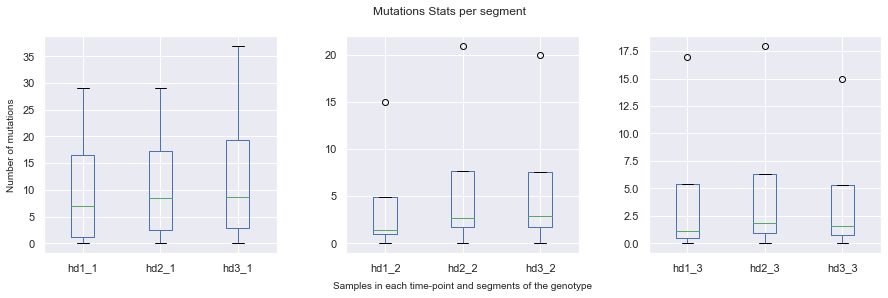

In [42]:
stats_plot1 = stats_summary.iloc[:,0:3]
stats_plot2 = stats_summary.iloc[:,3:6]
stats_plot3 = stats_summary.iloc[:,6:9]

fig = plt.figure(figsize=(15,4))

ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
ax2=fig.add_subplot(133)

stats_plot1.boxplot(ax = ax0)
stats_plot2.boxplot(ax = ax1)
stats_plot3.boxplot(ax = ax2)

fig.suptitle('Mutations Stats per segment')
fig.text(0.512, 0.01, 'Samples in each time-point and segments of the genotype', ha='center', va='center')
fig.text(0.095, 0.5, 'Number of mutations', ha='center', va='center', rotation='vertical')

fig.subplots_adjust(wspace = 0.3)